# What does your voice look like?

🎤 Recording for 5 seconds... Speak now!
✅ Recording complete!
This is your voice
Mel Spectogram


/Users/elsa/miniconda3/envs/py311env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Spectogram


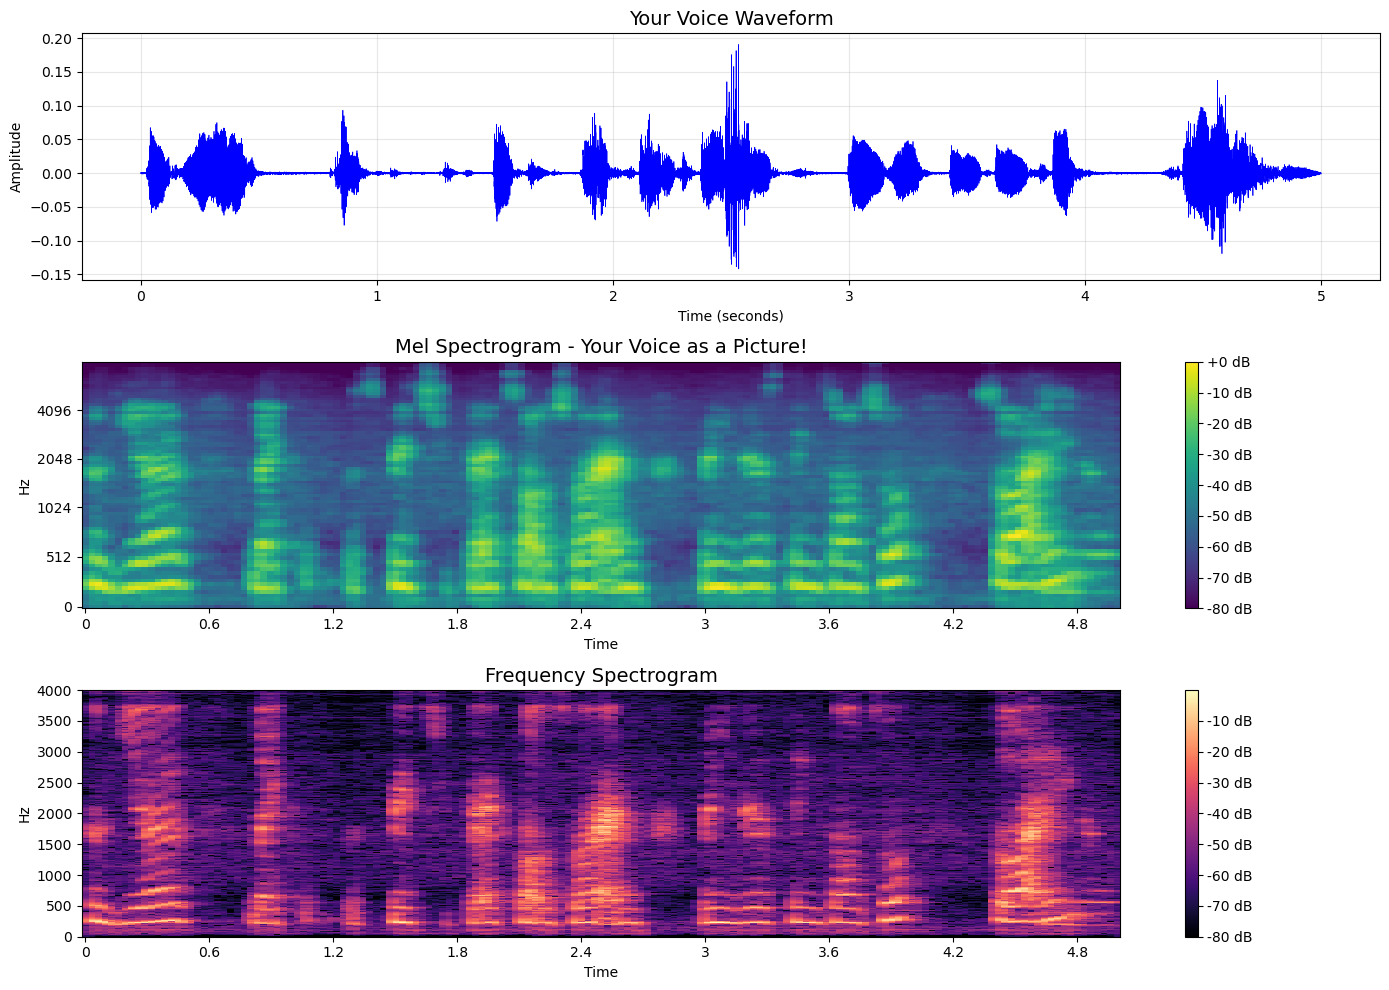

In [1]:
import sounddevice as sd
import numpy as np
import librosa
import librosa.display
import librosa.feature 
import librosa.feature 
import matplotlib.pyplot as plt
from IPython.display import Audio, display

duration = 5  # seconds
sample_rate = 16000

print(f"🎤 Recording for {duration} seconds... Speak now!")
audio = sd.rec(int(duration * sample_rate), 
               samplerate=sample_rate, 
               channels=1, 
               dtype='float32')
sd.wait()
audio = audio.flatten()
print("✅ Recording complete!")


print("This is your voice")
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

time = np.linspace(0, len(audio) / sample_rate, len(audio))
axes[0].plot(time, audio, color='blue', linewidth=0.5)
axes[0].set_title('Your Voice Waveform', fontsize=14)
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True, alpha=0.3)

print("Mel Spectogram") 
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=80)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
img = librosa.display.specshow(mel_spec_db, sr=sample_rate, 
                                x_axis='time', y_axis='mel', 
                                ax=axes[1], cmap='viridis')
axes[1].set_title('Mel Spectrogram - Your Voice as a Picture!', fontsize=14)
plt.colorbar(img, ax=axes[1], format='%+2.0f dB')

print("Spectogram") 
D = librosa.stft(audio)
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img2 = librosa.display.specshow(D_db, sr=sample_rate, 
                                 x_axis='time', y_axis='hz', 
                                 ax=axes[2], cmap='magma')
axes[2].set_title('Frequency Spectrogram', fontsize=14)
axes[2].set_ylim(0, 4000)  # Focus on speech frequencies
plt.colorbar(img2, ax=axes[2], format='%+2.0f dB')

plt.tight_layout()
plt.show()

# Whisper API

🎤 Recording for 5 seconds... Speak now!
✅ Recording complete!
This is your voice
Mel Spectogram
Spectogram


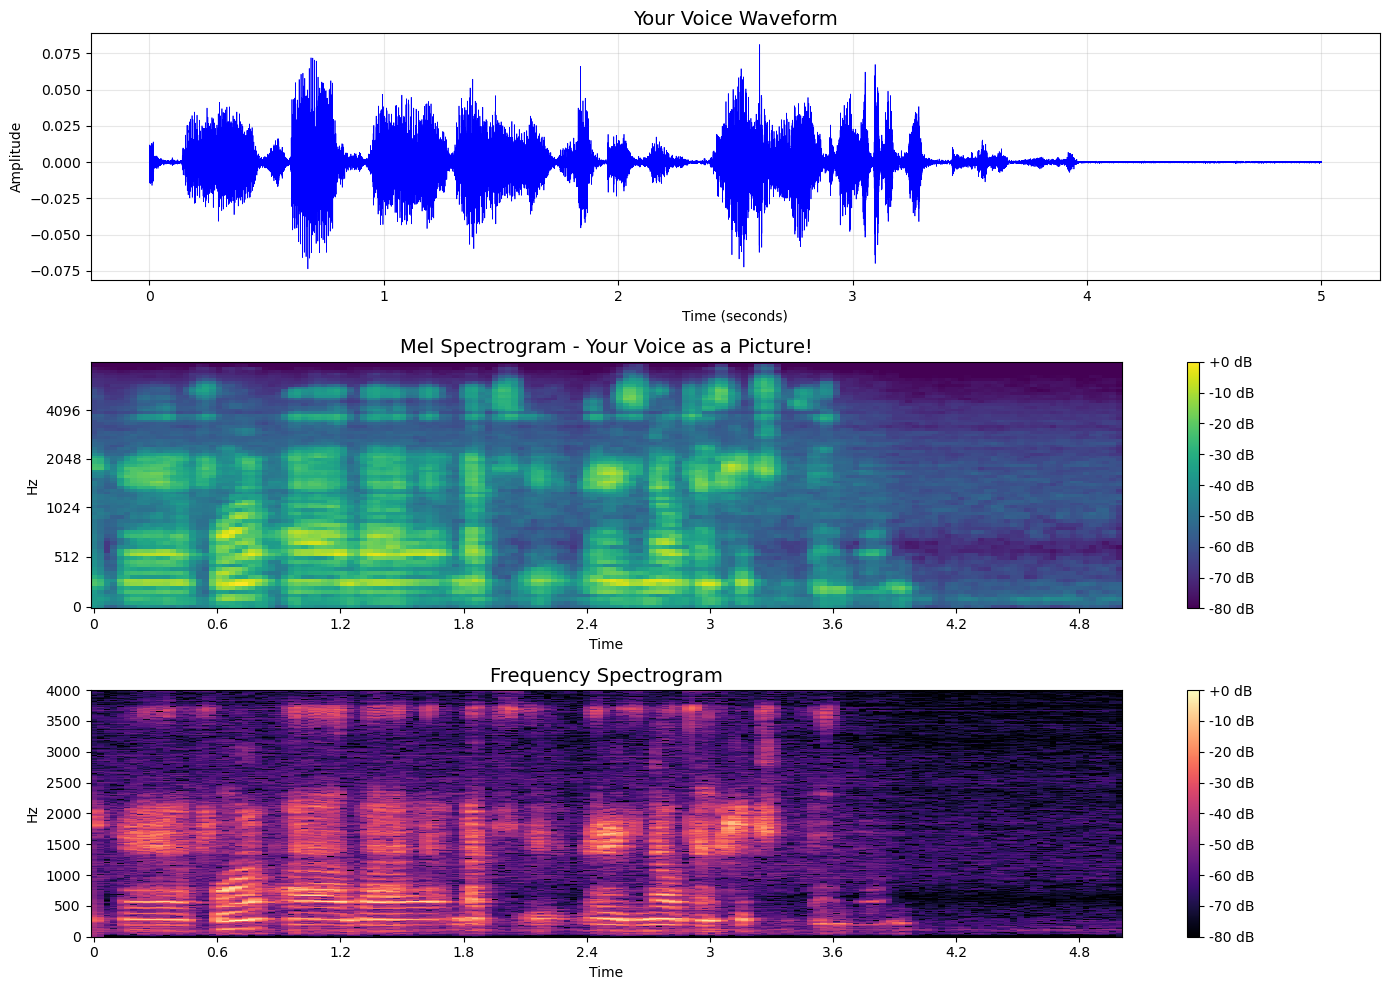

In [2]:
import sounddevice as sd
import numpy as np
import librosa
import librosa.display
import librosa.feature 
import librosa.feature 
import matplotlib.pyplot as plt
from IPython.display import Audio, display

duration = 5  # seconds
sample_rate = 16000

print(f"🎤 Recording for {duration} seconds... Speak now!")
audio = sd.rec(int(duration * sample_rate), 
               samplerate=sample_rate, 
               channels=1, 
               dtype='float32')
sd.wait()
audio = audio.flatten()
print("✅ Recording complete!")


print("This is your voice")
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

time = np.linspace(0, len(audio) / sample_rate, len(audio))
axes[0].plot(time, audio, color='blue', linewidth=0.5)
axes[0].set_title('Your Voice Waveform', fontsize=14)
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True, alpha=0.3)

print("Mel Spectogram") 
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=80)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
img = librosa.display.specshow(mel_spec_db, sr=sample_rate, 
                                x_axis='time', y_axis='mel', 
                                ax=axes[1], cmap='viridis')
axes[1].set_title('Mel Spectrogram - Your Voice as a Picture!', fontsize=14)
plt.colorbar(img, ax=axes[1], format='%+2.0f dB')

print("Spectogram") 
D = librosa.stft(audio)
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img2 = librosa.display.specshow(D_db, sr=sample_rate, 
                                 x_axis='time', y_axis='hz', 
                                 ax=axes[2], cmap='magma')
axes[2].set_title('Frequency Spectrogram', fontsize=14)
axes[2].set_ylim(0, 4000)  # Focus on speech frequencies
plt.colorbar(img2, ax=axes[2], format='%+2.0f dB')

plt.tight_layout()
plt.show()

In [6]:
import scipy.io.wavfile as wavfile
from openai import OpenAI
import io
import os 
from IPython.display import Audio, display
from dotenv import load_dotenv

load_dotenv()

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

duration = 5  # seconds
sample_rate = 16000

print(f"🎤 Recording for {duration} seconds... Speak now!")
audio = sd.rec(int(duration * sample_rate), 
               samplerate=sample_rate, 
               channels=1, 
               dtype='float32')
sd.wait()
audio = audio.flatten()
print("✅ Recording complete!")


audio_int16 = np.int16(audio * 32767)

# Create in-memory WAV file
buffer = io.BytesIO()
wavfile.write(buffer, sample_rate, audio_int16)
buffer.seek(0)
buffer.name = "recording.wav"  # Whisper needs a filename

# Transcribe with Whisper
print("🤖 Transcribing with Whisper...")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=buffer
)

print("\n📝 Transcription:")
print("-" * 40)
print(transcript.text)

ModuleNotFoundError: No module named 'dotenv'

# Super Power: Context

In [16]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wavfile
from openai import OpenAI
import io
from IPython.display import Audio, display, Markdown

#client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Display a 30-second reading text
reading_text = """
**Read this text aloud (about 30 seconds):**

The researchers' analyses of the wind farm data showed variable wind patterns. The project 
lead will lead the team through complex permit processes. They must present the present 
findings to investors. The 3 million contract includes clauses for force majeure 
events. Dr. García-Smith's team discovered that the enzyme's pH of 7.2 was optimal. The 
AI learned to differentiate between "read" (present) and "read" (past), processing live 
feeds versus archived content. The baroque bass player stood close to the entrance, too 
close to record properly.
"""

display(Markdown(reading_text))

# Record for 30 seconds
duration = 45
sample_rate = 16000

print(f"\n🎤 Recording for {duration} seconds... Start reading now!")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
sd.wait()
audio = audio.flatten()
print("✅ Recording complete!")

display(Audio(audio, rate=sample_rate))


# Prepare audio
audio_int16 = np.int16(audio * 32767)
buffer = io.BytesIO()
wavfile.write(buffer, sample_rate, audio_int16)
buffer.seek(0)
buffer.name = "recording.wav"

# Transcribe without context prompt
print("🤖 Transcribing without context...")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=buffer,
)

print("\n📝 Transcription:")
print("-" * 40)
print(transcript.text)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:

# Transcribe with context prompt
print("🤖 Transcribing with context...")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=buffer,
    prompt = "heteronyms, homographs, lead metal, wind turbine, present tense, past tense read, pH levels, enzyme, García-Smith, force majeure, baroque, bass instrument, differentiate")

print("\n📝 Transcription:")
print("-" * 40)
print(transcript.text)


# Chunking

In [ ]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wavfile
from openai import OpenAI
import io

#client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Record longer audio
duration = 15  # seconds total
sample_rate = 16000
chunk_duration = 5  # seconds per chunk

print(f"🎤 Recording for {duration} seconds... Speak continuously!")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
sd.wait()
audio = audio.flatten()
print("✅ Recording complete!")

display(Audio(audio, rate=sample_rate))


# Split audio into chunks
chunk_size = chunk_duration * sample_rate
chunks = [audio[i:i+chunk_size] for i in range(0, len(audio), chunk_size)]

print(f"\n🔪 Split into {len(chunks)} chunks")

# Transcribe each chunk
all_transcripts = []

for i, chunk in enumerate(chunks):
    print(f"\n🤖 Transcribing chunk {i+1}/{len(chunks)}...")
    
    # Prepare chunk buffer
    chunk_int16 = np.int16(chunk * 32767)
    buffer = io.BytesIO()
    wavfile.write(buffer, sample_rate, chunk_int16)
    buffer.seek(0)
    buffer.name = f"chunk_{i}.wav"
    
    # Transcribe
    transcript = client.audio.transcriptions.create(
        model="whisper-1",
        file=buffer
    )
    
    all_transcripts.append(transcript.text)
    print(f"Chunk {i+1}: {transcript.text}")

# Combine all transcripts
print("\n📝 Complete Transcription:")
print("-" * 40)
full_text = " ".join(all_transcripts)
print(full_text)

# Time Stamps

In [ ]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wavfile
from openai import OpenAI
import io
from IPython.display import Audio, display

#client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

duration = 10  # seconds
sample_rate = 16000

print(f"🎤 Recording for {duration} seconds... Speak with pauses!")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
sd.wait()
audio = audio.flatten()
print("✅ Recording complete!")

# Play back
display(Audio(audio, rate=sample_rate))

# Prepare audio
audio_int16 = np.int16(audio * 32767)
buffer = io.BytesIO()
wavfile.write(buffer, sample_rate, audio_int16)
buffer.seek(0)
buffer.name = "recording.wav"

# Get detailed transcription with timestamps
print("\n🤖 Transcribing with timestamps...")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=buffer,
    response_format="verbose_json",
    timestamp_granularities=["segment", "word"]  # Get both segment and word timestamps
)

# Display formatted timestamps
print("\n📝 Transcription with timestamps:")
print("-" * 40)

# Show segments with timestamps
if hasattr(transcript, 'segments'):
    for segment in transcript.segments:
        start = segment.start
        end = segment.end
        text = segment.text
        print(f"\n[{start:.2f}s - {end:.2f}s]")
        print(f"  {text}")

# Show word-level timestamps if available
if hasattr(transcript, 'words'):
    print("\n🔤 Word-level timing:")
    print("-" * 40)
    for word in transcript.words:
        word_text = word.word
        start = word.start
        end = word.end
        print(f"{word_text:15} [{start:.2f}s - {end:.2f}s]")

# Full text and metadata
print("\n📄 Full text:")
print(transcript.text)

print(f"\n🌍 Language detected: {transcript.language}")
print(f"⏱️ Total duration: {transcript.duration:.2f}s")